 Fs=1000 hz
 Ts=0.001 s


Text(0.5, 1.0, 'Respuesta en frecuencia señal EMG')

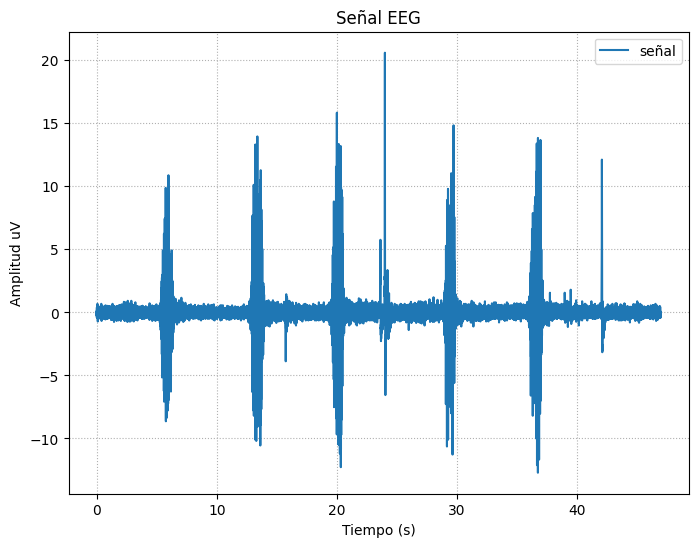

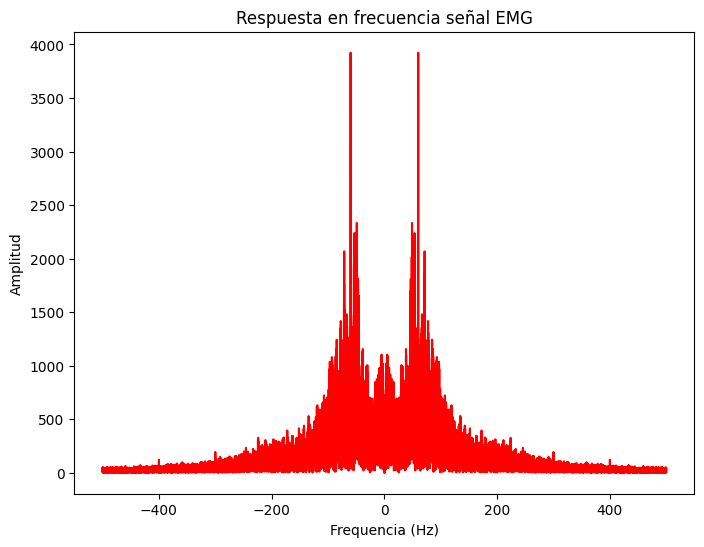

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from scipy import signal

from scipy.signal import firwin, lfilter
from scipy.fftpack import fft, fftshift


f = open("Nataly.txt","r")
raw_data = f.read()  # con f.read() leemos todo el contenido
f.close()

raw_data
Fs = 1000
Ts = 1/Fs
print(f" Fs={Fs} hz\n Ts={Ts} s")

a = np.genfromtxt("./Nataly.txt", delimiter="\t",skip_header = 3)
eeg = a[:, 5]
N=len(eeg)
eeg = eeg - np.mean(eeg)
eeg = np.array(eeg) * 40000/1000000
t = np.arange(1, len(eeg)+1)/Fs
plt.figure(figsize=(8, 6))
plt.plot(t, eeg, label="señal")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud uV")
plt.legend(loc="upper right")
plt.title("Señal EMG")
plt.grid(linestyle=":")


#FFT
def fft_fun(x, fs):
    X = fftshift(fft(x))
    N = len(X)
    w = 2 * np.pi * np.arange(N) / N
    w = np.unwrap(fftshift(w)) - 2 * np.pi
    wHz = w * fs / (2 * np.pi)
    return wHz, X


wHz, Y = fft_fun(eeg, Fs)

#Grafica FFT EEG
plt.figure(figsize=(8, 6))
plt.plot(wHz, np.abs(Y), "r")
plt.xlabel("Frequencia (Hz)")
plt.ylabel("Amplitud")
plt.title("Respuesta en frecuencia señal EMG")











0.113
0.127
1333


Text(0.5, 1.0, 'Respuesta en frecuencia señal EMG filtrada')

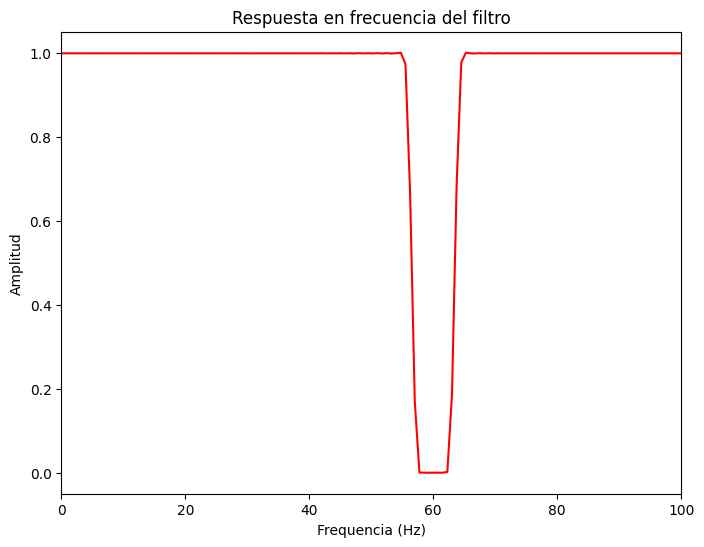

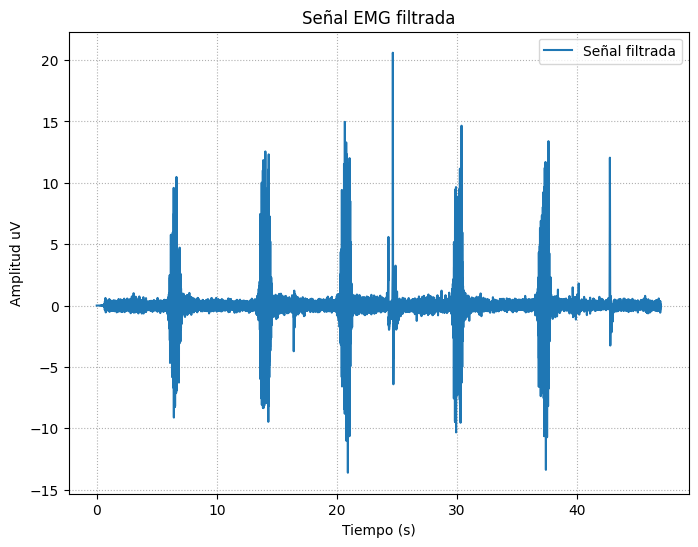

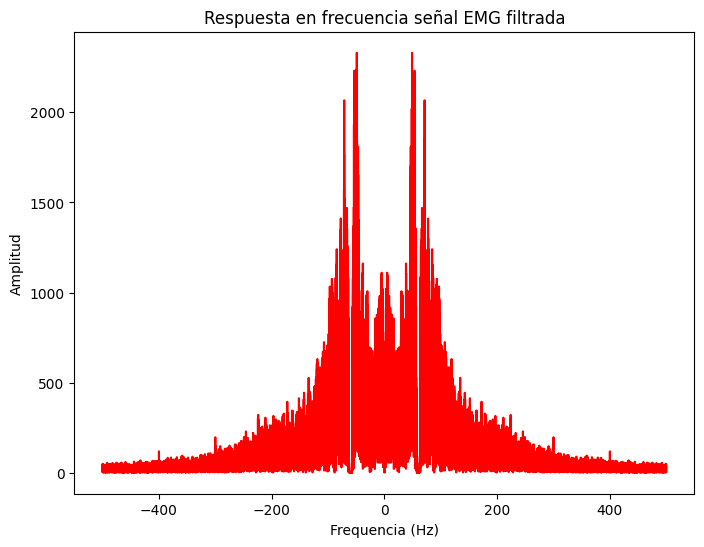

In [12]:

# Definir frecuencia de corte del filtro pasabajo
wp = 55  / (Fs / 2)
ws = 58  / (Fs / 2)
wc=(wp + ws) / 2
print(wc)
wp1 = 65  / (Fs / 2)
ws1 = 62  / (Fs / 2)
wc1=(wp1 + ws1) / 2

print(wc1)

dw= ws-wp
# Definir el orden del filtro
M =  int(np.floor(8 / dw))
print(M)

lowpass_filter= firwin(numtaps=M, cutoff=[wc,wc1],  window='hamming')




wHz, Y = fft_fun(lowpass_filter, Fs)

plt.figure(figsize=(8, 6))

plt.plot(wHz, np.abs(Y), "r")
plt.xlabel("Frequencia (Hz)")
plt.ylabel("Amplitud")
plt.title("Respuesta en frecuencia del filtro")
plt.xlim(0,100)



filtered_signal = lfilter(lowpass_filter, 1, eeg)

wHz, filtered_signal_fft = fft_fun(filtered_signal, Fs)

t = np.arange(1, len(filtered_signal)+1)/Fs

plt.figure(figsize=(8, 6))
plt.plot(t, filtered_signal, label="Señal filtrada")
plt.title("Señal EMG filtrada")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud uV")
plt.legend(loc="upper right")
plt.grid(linestyle=":")



plt.figure(figsize=(8, 6))
plt.plot(wHz, np.abs(filtered_signal_fft), "r")
plt.xlabel("Frequencia (Hz)")
plt.ylabel("Amplitud")
plt.title("Respuesta en frecuencia señal EMG filtrada")


